In [2]:
# from lib.draw_pitch import draw_pitch, draw_half_pitch
# import relevant libraries
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce
from PIL import Image as Img
from IPython.display import Image, display

from matplotlib.lines import Line2D
import matplotlib.markers

from lib.draw_pitch import draw_fancy_pitch

ModuleNotFoundError: No module named 'lib.draw_pitch'

In [1]:
df = pd.read_excel('game-data-time.xls')

NameError: name 'pd' is not defined

<h1> Basic Statistics </h1>

In [ ]:
'''
Excercise after Statistics in Football workshop by Ekstrastats.
'''

In [5]:
#PASSES

passes_all = [ 'Non attacking pass accurate',
               'Attacking pass accurate', 
               'Attacking pass inaccurate',
               'Crosses inaccurate', 
               'Inaccurate key pass',
               'Assist',
               'Crosses accurate',
               'Accurate key pass', 
               'Pass into offside'
               'Extra attacking pass accurate', 
               'Non attacking pass inaccurate',
             ]

passes_acc = [ 'Non attacking pass accurate',
               'Attacking pass accurate', 
               'Assist',
               'Crosses accurate',
               'Accurate key pass', 
               'Extra attacking pass accurate', 
               'Key assist'
             ]

passes_att_all = [ 
               'Attacking pass accurate', 
               'Attacking pass inaccurate',
               'Crosses accurate',
               'Accurate key pass', 
               'Extra attacking pass accurate', 
               'Key assist',
               'Inaccurate extra attacking pass'
             ]

passes_att_acc = [ 
               'Attacking pass accurate', 
               'Crosses accurate',
               'Accurate key pass', 
               'Extra attacking pass accurate', 
               'Key assist'
             ]

passes_non_att_all = [ 'Non attacking pass accurate',           
                     'Non attacking pass inaccurate',
             ]

passes_non_att_acc = ['Non attacking pass accurate']


### SHOTS 

shots_all = ['Shot on target',
                 'Shot blocked',
                 'Wide shot']

shots_ontarget = ['Shot on target']

chances_created = ['Chance was created by']





In [6]:
#DEFINE TEAMS
teams = df['team_name'].unique()

In [7]:
game_result              = df.loc[df['action_type_name'] == 'Goal'].groupby('team_name')['action_type_name'].count()

#passes
game_passes_all          = df.loc[df['action_type_name'].isin(passes_all)].groupby('team_name')['action_type_name'].count()
game_passes_acc          = df.loc[df['action_type_name'].isin(passes_acc)].groupby('team_name')['action_type_name'].count()
game_passes_att          = df.loc[df['action_type_name'].isin(passes_att_all)].groupby('team_name')['action_type_name'].count()
game_passes_att_acc      = df.loc[df['action_type_name'].isin(passes_att_acc)].groupby('team_name')['action_type_name'].count()
game_passes_non_att      = df.loc[df['action_type_name'].isin(passes_non_att_all)].groupby('team_name')['action_type_name'].count()
game_passes_non_att_acc  = df.loc[df['action_type_name'].isin(passes_non_att_acc)].groupby('team_name')['action_type_name'].count()

# shots
game_shots_all           = df.loc[df['action_type_name'].isin(shots_all)].groupby('team_name')['action_type_name'].count()
game_shots_ontarget      = df.loc[df['action_type_name'].isin(shots_ontarget)].groupby('team_name')['action_type_name'].count()
game_shots_wide          = df.loc[df['action_type_name'] == 'Wide shot'].groupby('team_name')['action_type_name'].count()
game_shots_blocked       = df.loc[df['action_type_name'] == 'Shot blocked'].groupby('team_name')['action_type_name'].count()
game_chances             = df.loc[df['action_type_name'].isin(chances_created)].groupby('team_name')['action_type_name'].count()

In [8]:
p = pd.concat([
            game_passes_all        , 
            game_passes_acc        , 
            game_passes_att        , 
            game_passes_att_acc    , 
            game_passes_non_att    , 
            game_passes_non_att_acc,
    
            game_shots_all,
            game_shots_ontarget,        
            game_shots_wide,
            game_shots_blocked,
            game_chances], axis=1)

p.columns = ['game_passes_all', 
             'game_passes_acc' ,
             'game_passes_att' ,
             'game_passes_att_acc', 
             'game_passes_non_att' ,
             'game_passes_non_att_acc',
             'game_shots_all',
             'game_shots_ontarget',
             'game_shots_wide',           
             'game_shots_blocked',
             'game_chances']

In [9]:
p['pass_accuracy_perc']          = round((p['game_passes_acc']/p['game_passes_all'])*100, 2)
p['pass_attacking_to_all_ratio'] = round((p['game_passes_att']/p['game_passes_all'])*100, 2)
p['shots_accuracy']              = round((p['game_shots_ontarget']/p['game_shots_all'])*100, 2)
p['shot_per100_passes']          = p['game_shots_all']/(p['game_passes_all']/100)

In [10]:
PASSES_STATS = p[['game_passes_all','pass_accuracy_perc',
                  'pass_attacking_to_all_ratio',
                  'shot_per100_passes']]

SHOTS_STATS =  p[['game_shots_all', 'game_shots_ontarget','game_shots_wide', 'game_shots_blocked',
                  'shots_accuracy', 'shot_per100_passes', 'game_chances']]

In [12]:
PASSES_STATS

,game_passes_all,pass_accuracy_perc,pass_attacking_to_all_ratio,shot_per100_passes
team_name,,,,
Cracovia,344,78.49,78.78,3.779070
Raków Czêstochowa,544,85.48,70.96,4.044118


In [11]:
SHOTS_STATS

,game_shots_all,game_shots_ontarget,game_shots_wide,game_shots_blocked,shots_accuracy,shot_per100_passes,game_chances
team_name,,,,,,,
Cracovia,13,4,3,6,30.77,3.779070,7
Raków Czêstochowa,22,6,10,6,27.27,4.044118,8


In [13]:
game_summary = pd.concat([
    
            game_result            , 
            game_passes_all        , 
            game_passes_att        , 
            game_shots_all         ,
            game_shots_ontarget    ,
            game_chances], axis=1)

game_summary.columns = ['GOALS' ,
                        'PASSES',
                        'ATTACKING PASSES',
                        'SHOTS',
                        'SHOTS ON TARGET',
                        'CHANCES CREATED']

In [14]:
gmt = game_summary.transpose()

gmt['CRACOVIA'] = round((gmt['Cracovia']         /(gmt['Cracovia']+gmt['Raków Czêstochowa']))*100)
gmt['RAKOW']    = round((gmt['Raków Czêstochowa']/(gmt['Cracovia']+gmt['Raków Czêstochowa']))*100)

In [15]:
gmt_perc = gmt[['CRACOVIA', 'RAKOW']]

In [16]:
gmt = gmt[['Cracovia', 'Raków Czêstochowa']]

In [17]:
gmt_perc = gmt_perc[['RAKOW', 'CRACOVIA']]

## OVERALL STATS PERCENTAGE 

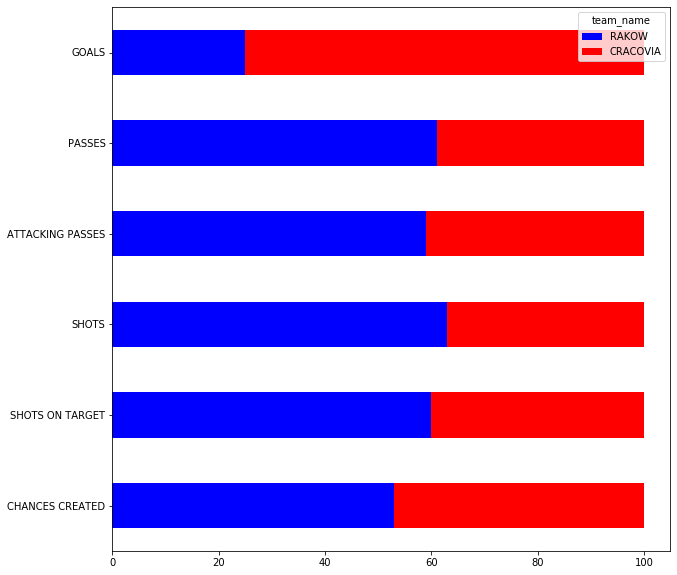

In [18]:
gmt_perc.iloc[::-1].plot(kind='barh', stacked=True, figsize=(10,10), color=['blue','red'])
# plt.savefig(r'rakow-cracovia/overall_stats.png', bbox_inches='tight')

In [50]:
## 

In [52]:
gmt[['Raków Czêstochowa', 'Cracovia']]

team_name,Raków Czêstochowa,Cracovia
GOALS,1,3
PASSES,544,344
ATTACKING PASSES,386,271
SHOTS,22,13
SHOTS ON TARGET,6,4
CHANCES CREATED,8,7


<h1> Passes </h1>

In [19]:
passes = df.loc[df['action_type_name'].isin(['team_name', 'player_name', 'Attacking pass accurate', 'Accurate key pass', 'Extra attacking pass accurate', 'loc_x', 'loc_y', 'loc_dest_x', 'loc_dest_y']) == True]

passes_cracovia = passes.loc[passes['team_name'] == 'Cracovia']
passes_rakow    = passes.loc[passes['team_name'] != 'Cracovia']

<h2> Raków </h2>

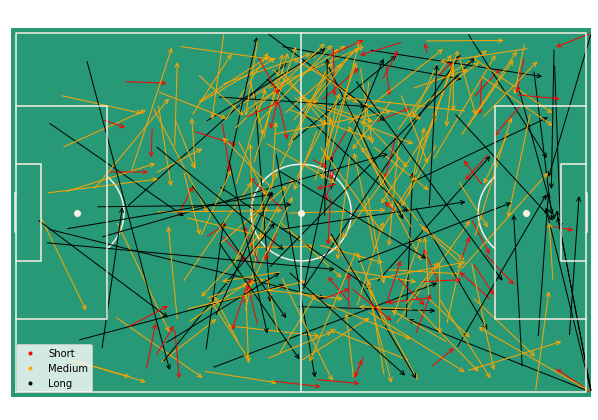

In [87]:
draw_fancy_pitch("#289976","#faf0e6","h","full")


plt.gcf().text(0.12, 0.9, 'Passes - Raków', fontsize=14, color='white')
plt.gcf().text(0.65, 0.1, 'twitter.com/patryk_lowicki', fontsize=14, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=14, color='white') 


for i in range(len(passes_rakow)):
    if passes_rakow.iloc[i]['len'] <= 10:
        plt.annotate('', xy = (passes_rakow.iloc[i]['pos_dest_x'], passes_rakow.iloc[i]['pos_dest_y']), 
                        xytext =  (passes_rakow.iloc[i]['pos_x'],  passes_rakow.iloc[i]['pos_y']), 
                        arrowprops=dict(arrowstyle="->", color='red'))
    
    
    elif passes_rakow.iloc[i]['len'] <= 25:
        plt.annotate('', xy = (passes_rakow.iloc[i]['pos_dest_x'], passes_rakow.iloc[i]['pos_dest_y']), 
                    xytext =  (passes_rakow.iloc[i]['pos_x'],      passes_rakow.iloc[i]['pos_y']), 
                    arrowprops=dict(arrowstyle="->", color='orange'))
    else:
        plt.annotate('', xy = (passes_rakow.iloc[i]['pos_dest_x'], passes_rakow.iloc[i]['pos_dest_y']), 
                    xytext =  (passes_rakow.iloc[i]['pos_x'],      passes_rakow.iloc[i]['pos_y']), 
                    arrowprops=dict(arrowstyle="->"))

        

plt.legend(custom, ['Short', 'Medium', 'Long'], loc='lower left')
        
plt.savefig(r'rakow-cracovia/rakow-passes.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

<h2> Cracovia </h2>

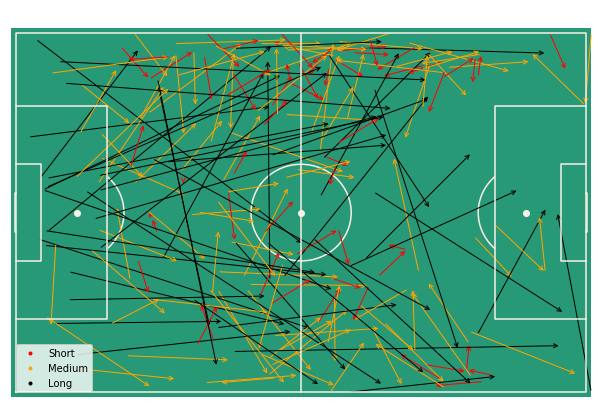

In [85]:
draw_fancy_pitch("#289976","#faf0e6","h","full")
# sns.scatterplot(data=goals, x='pos_x', y='pos_y', zorder=12, s=200, hue='team_name')
# sns.scatterplot(data=goals, x=(int('pos_dest_x')-5), y='pos_dest_y', color='red', s=100)


plt.gcf().text(0.12, 0.9, 'Passes lenght - Cracovia', fontsize=14, color='white')
plt.gcf().text(0.65, 0.1, 'twitter.com/patryk_lowicki', fontsize=14, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=14, color='white')    



for i in range(len(passes_cracovia)):
    if passes_cracovia.iloc[i]['len'] <= 10:
        plt.annotate('', xy = (passes_cracovia.iloc[i]['pos_dest_x'], passes_cracovia.iloc[i]['pos_dest_y']), 
                        xytext =  (passes_cracovia.iloc[i]['pos_x'],      passes_cracovia.iloc[i]['pos_y']), 
                        arrowprops=dict(arrowstyle="->", color='red'), label='short')
    
    
    elif passes_cracovia.iloc[i]['len'] <= 25:
        plt.annotate('', xy = (passes_cracovia.iloc[i]['pos_dest_x'], passes_cracovia.iloc[i]['pos_dest_y']), 
                    xytext =  (passes_cracovia.iloc[i]['pos_x'],      passes_cracovia.iloc[i]['pos_y']), 
                    arrowprops=dict(arrowstyle="->", color='orange'))
    else:
        plt.annotate('', xy = (passes_cracovia.iloc[i]['pos_dest_x'], passes_cracovia.iloc[i]['pos_dest_y']), 
                    xytext =  (passes_cracovia.iloc[i]['pos_x'],      passes_cracovia.iloc[i]['pos_y']), 
                    arrowprops=dict(arrowstyle="->", color='black'))

        
custom = [Line2D([], [], marker='.', color='red',    linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None'),
         Line2D([], [],  marker='.', color='black',  linestyle='None')]

plt.legend(custom, ['Short', 'Medium', 'Long'], loc='lower left')

plt.savefig(r'rakow-cracovia/passes-cracovia.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

<h3> Cracovia passes without goalkeeper's </h3>

In [97]:
len(passes_cracovia.loc[passes_cracovia['position_name'] == 'Goalkeeper'])/len(passes_cracovia)

0.115

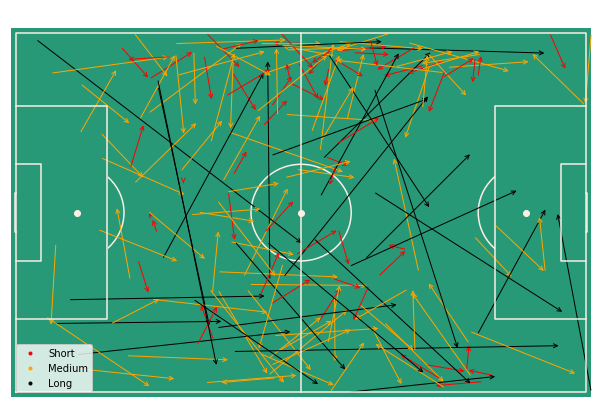

In [99]:
draw_fancy_pitch("#289976","#faf0e6","h","full")
# sns.scatterplot(data=goals, x='pos_x', y='pos_y', zorder=12, s=200, hue='team_name')
# sns.scatterplot(data=goals, x=(int('pos_dest_x')-5), y='pos_dest_y', color='red', s=100)


plt.gcf().text(0.12, 0.9, 'Passes lenght - Cracovia', fontsize=14, color='white')
plt.gcf().text(0.65, 0.1, 'twitter.com/patryk_lowicki', fontsize=14, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=14, color='white')    



for i in range(len(passes_cracovia)):
    if passes_cracovia.iloc[i]['position_name'] == 'Goalkeeper':
        pass
    
    elif passes_cracovia.iloc[i]['len'] <= 10:
        plt.annotate('', xy = (passes_cracovia.iloc[i]['pos_dest_x'], passes_cracovia.iloc[i]['pos_dest_y']), 
                        xytext =  (passes_cracovia.iloc[i]['pos_x'],      passes_cracovia.iloc[i]['pos_y']), 
                        arrowprops=dict(arrowstyle="->", color='red'), label='short')
    
    
    elif passes_cracovia.iloc[i]['len'] <= 25:
        plt.annotate('', xy = (passes_cracovia.iloc[i]['pos_dest_x'], passes_cracovia.iloc[i]['pos_dest_y']), 
                    xytext =  (passes_cracovia.iloc[i]['pos_x'],      passes_cracovia.iloc[i]['pos_y']), 
                    arrowprops=dict(arrowstyle="->", color='orange'))
    else:
        plt.annotate('', xy = (passes_cracovia.iloc[i]['pos_dest_x'], passes_cracovia.iloc[i]['pos_dest_y']), 
                    xytext =  (passes_cracovia.iloc[i]['pos_x'],      passes_cracovia.iloc[i]['pos_y']), 
                    arrowprops=dict(arrowstyle="->", color='black'))

        
custom = [Line2D([], [], marker='.', color='red',    linestyle='None'),
          Line2D([], [], marker='.', color='orange', linestyle='None'),
         Line2D([], [],  marker='.', color='black',  linestyle='None')
#          ,Line2D([], [],  marker='.', color='blue',  linestyle='None')
         ]

plt.legend(custom, ['Short', 'Medium', 'Long'], loc='lower left')

plt.savefig(r'rakow-cracovia/passes-cracovia-nogk.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

<h3> Player's passes </h3>

In [23]:
passes_rakow['pass_short'] = np.where( passes_rakow['len'] <= 10, 1, 0)
passes_rakow['pass_med']   = np.where((passes_rakow['len'] > 10) & (passes_rakow['len'] <= 25), 1, 0)
passes_rakow['pass_long']  = np.where( passes_rakow['len'] > 25 , 1, 0)

passes_cracovia['pass_short'] = np.where( passes_cracovia['len'] <= 10, 1, 0)
passes_cracovia['pass_med']   = np.where((passes_cracovia['len'] > 10) & (passes_cracovia['len'] <= 25), 1, 0)
passes_cracovia['pass_long']  = np.where( passes_cracovia['len'] > 25 , 1, 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [25]:
passes_cracovia_players = passes_cracovia.groupby('player_name').sum()[['pass_short', 'pass_med','pass_long']]
passes_cracovia_players = passes_cracovia_players.sum(axis=1)

passes_rakow_players = passes_rakow.groupby('player_name').sum()[['pass_short', 'pass_med','pass_long']]
passes_rakow_players = passes_rakow_players.sum(axis=1)

passes_cracovia_players = pd.DataFrame(passes_cracovia_players, columns=['passes']).reset_index()
passes_rakow_players =    pd.DataFrame(passes_rakow_players, columns=['passes']).reset_index()

<h1> Average Player Position </h1>

In [26]:
## SELECT STARTING 11 PLAYERS 
first_11_cracovia = df.loc[df['team_name'] == 'Cracovia'].groupby('player_name').count().sort_values(by='action_id')[3:]
first_11_rakow    = df.loc[df['team_name'] != 'Cracovia'].groupby('player_name').count().sort_values(by='action_id')[3:]

first_11_cracovia = first_11_cracovia.reset_index()['player_name']
first_11_rakow    = first_11_rakow.reset_index()['player_name']

#DEFINING AVG XY
avg_xy_cracovia = df.loc[df['player_name'].isin(first_11_cracovia)].groupby('player_name').mean()[['pos_x', 'pos_y']]
avg_xy_rakow =    df.loc[df['player_name'].isin(first_11_rakow)].groupby('player_name').mean()[['pos_x', 'pos_y']]

avg_xy_rakow.reset_index(inplace=True)

In [27]:
avg_xy_rakow = pd.merge(avg_xy_rakow, passes_rakow_players, 
         left_on='player_name', right_on='player_name',
         how='inner', right_index=False, left_index=False)


avg_xy_cracovia = pd.merge(avg_xy_cracovia, passes_cracovia_players, 
         left_on='player_name', right_on='player_name',
         how='inner', right_index=False, left_index=False)

<h2> Raków </h2>

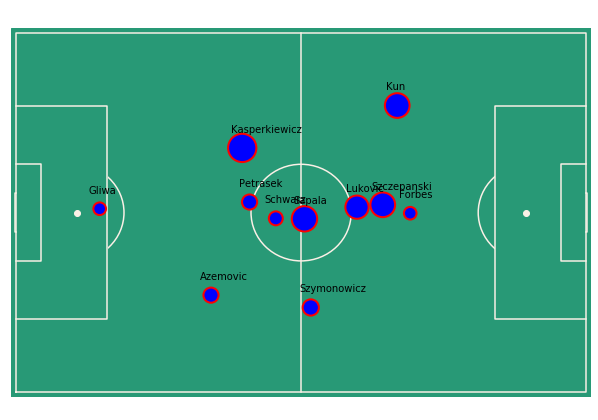

In [118]:
draw_fancy_pitch("#289976","#faf0e6","h","full")


sns.scatterplot(data=avg_xy_rakow, x='pos_x', y='pos_y', color='blue', edgecolor='red', linewidth=2,
                size='passes',sizes=(160,800), zorder=12, legend=False)

for i in range(len(avg_xy_rakow)):
    row = avg_xy_rakow.iloc[i]
    plt.annotate(xy= (row['pos_x']-2, row['pos_y']+3),
                s=row['player_name'].split(' ')[-1], zorder=13)



plt.gcf().text(0.12, 0.9, 'Average location - Raków', fontsize=14, color='white')
plt.gcf().text(0.65, 0.1, 'twitter.com/patryk_lowicki', fontsize=14, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=14, color='white')    
    
plt.savefig(r'rakow-cracovia/avg_position_rakow.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)    

<h2> Cracovia </h2>

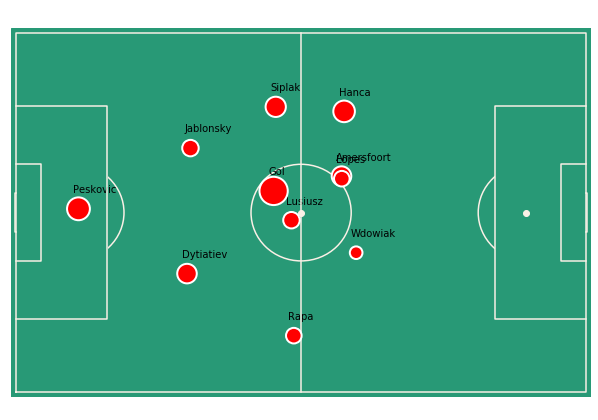

In [119]:
draw_fancy_pitch("#289976","#faf0e6","h","full")


sns.scatterplot(data=avg_xy_cracovia, x='pos_x', y='pos_y', 
                color='red', edgecolor='white',size='passes',sizes=(160,800), zorder=12, legend=False, linewidth=2)

for i in range(len(avg_xy_cracovia)):
    plt.annotate(xy= (avg_xy_cracovia.iloc[i]['pos_x']-1, avg_xy_cracovia.iloc[i]['pos_y']+3),
                s=avg_xy_cracovia.iloc[i]['player_name'].split(' ')[-1])


!  
    
plt.savefig(r'rakow-cracovia/avg_position_cracovia.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)    

<h1> Shots & goals </h1>

In [37]:
shots = df.loc[df['action_type_name'].isin(shots_all)]
goals = df.loc[(df['action_type_name'] == 'Goal')][['t_seconds', 'half', 'action_type_name', 'team_name', 'player_name', 
                                            'pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y']]
goals_assists = df.loc[(df['action_type_name'] == 'Goal')
      |(df['action_type_name'] == 'Assist')][['t_seconds', 'half', 'action_type_name', 'team_name', 'player_name', 
                                            'pos_x', 'pos_y', 'pos_dest_x', 'pos_dest_y']]

shots_cracovia = shots.loc[shots['team_name'] == 'Cracovia']
shots_rakow    = shots.loc[shots['team_name'] != 'Cracovia']

goals_cracovia = goals.loc[goals['team_name'] == 'Cracovia']
goals_rakow    = goals.loc[goals['team_name'] != 'Cracovia']

In [38]:
#STYLING
markers_goal = {"Goal": "o",
               "Shot on target" : 'o',
               'Wide shot': 'D',
               'Shot blocked': 's'}

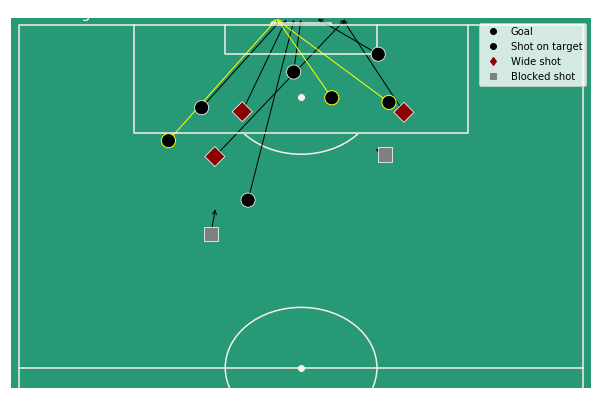

In [276]:
draw_fancy_pitch("#289976","#faf0e6","v","half")

sns.scatterplot(data=shots_cracovia, x='rev_y', y='pos_x', zorder=12, s=200, 
                hue='action_type_name', style='action_type_name', palette={
                    "Shot on target" : 'black',
                    'Wide shot': 'darkred',
                    'Shot blocked': 'gray'
                    },
                markers =markers_goal)


sns.scatterplot(data=goals_cracovia, x='rev_y', y='pos_x', zorder=12,
                s=200, color='black', edgecolor='yellow', linewidth=1,
                style='action_type_name', markers=markers_goal)


for i in range(len(shots_cracovia)):
    
    plt.annotate('', xy = (shots_cracovia.iloc[i]['rev_dest_y'], shots_cracovia.iloc[i]['pos_dest_x']), 
                xytext =  (shots_cracovia.iloc[i]['rev_y'],      shots_cracovia.iloc[i]['pos_x']), 
                arrowprops=dict(arrowstyle="->", color = 'black'))

    
for i in range(len(goals_cracovia)):
    
    plt.annotate('', xy = (goals_cracovia.iloc[i]['rev_dest_y'], goals_cracovia.iloc[i]['pos_dest_x']), 
                xytext =  (goals_cracovia.iloc[i]['rev_y'],      goals_cracovia.iloc[i]['pos_x']), 
                arrowprops=dict(arrowstyle="->", color = 'yellow'))

# plt.gcf().text(0.12, 0.95, 'CRACOVIA', fontsize=14, color='white')
plt.gcf().text(0.12, 0.88, 'Shots and goals - Cracovia', fontsize=14, color='white')
plt.gcf().text(0.55, 0.1, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=12, color='white')    

custom = [Line2D([], [],  marker='o', color='black',  linestyle='None'),
          Line2D([], [],  marker='o', color='black', linestyle='None'),
          Line2D([], [],  marker='d', color='darkred',  linestyle='None'),
          Line2D([], [],  marker='s', color='grey',  linestyle='None')]

plt.legend(custom, ['Goal', 'Shot on target', 'Wide shot', 'Blocked shot'], loc='upper right')

plt.savefig(r'rakow-cracovia/goals-cracovia.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

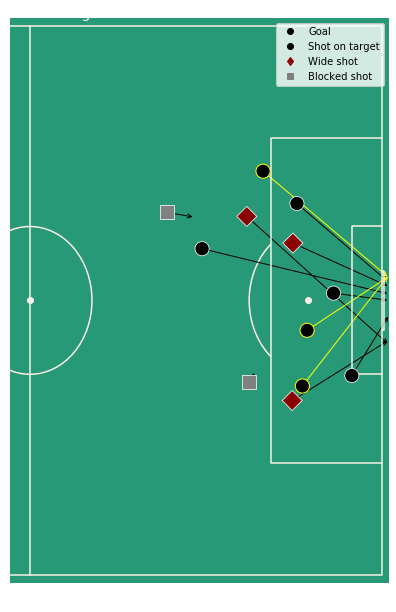

In [149]:
draw_fancy_pitch("#289976","#faf0e6","h","half")

sns.scatterplot(data=shots_cracovia, x='pos_x', y='pos_y', zorder=12, s=200, 
                hue='action_type_name', style='action_type_name', palette={
                    "Shot on target" : 'black',
                    'Wide shot': 'darkred',
                    'Shot blocked': 'gray'
                    },
                markers =markers_goal)


sns.scatterplot(data=goals_cracovia, x='pos_x', y='pos_y', zorder=12,
                s=200, color='black', edgecolor='yellow', linewidth=1,
                style='action_type_name', markers=markers_goal)


for i in range(len(shots_cracovia)):
    
    plt.annotate('', xy = (shots_cracovia.iloc[i]['pos_dest_x'], shots_cracovia.iloc[i]['pos_dest_y']), 
                xytext =  (shots_cracovia.iloc[i]['pos_x'],      shots_cracovia.iloc[i]['pos_y']), 
                arrowprops=dict(arrowstyle="->", color = 'black'))

    
for i in range(len(goals_cracovia)):
    
    plt.annotate('', xy = (goals_cracovia.iloc[i]['pos_dest_x'], goals_cracovia.iloc[i]['pos_dest_y']), 
                xytext =  (goals_cracovia.iloc[i]['pos_x'],      goals_cracovia.iloc[i]['pos_y']), 
                arrowprops=dict(arrowstyle="->", color = 'yellow'))

# plt.gcf().text(0.12, 0.95, 'CRACOVIA', fontsize=14, color='white')
plt.gcf().text(0.12, 0.88, 'Shots and goals - Cracovia', fontsize=14, color='white')
plt.gcf().text(0.55, 0.1, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=12, color='white')    

custom = [Line2D([], [],  marker='o', color='black',  linestyle='None'),
          Line2D([], [],  marker='o', color='black', linestyle='None'),
          Line2D([], [],  marker='d', color='darkred',  linestyle='None'),
          Line2D([], [],  marker='s', color='grey',  linestyle='None')]

plt.legend(custom, ['Goal', 'Shot on target', 'Wide shot', 'Blocked shot'], loc='upper right')

plt.savefig(r'rakow-cracovia/goals-cracovia.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

<h2> Raków </h2>

In [46]:
df['rev_y'] =      [68 - i for i in df['pos_y']]
df['rev_dest_y'] = [68 - i for i in df['pos_dest_y']]

In [39]:
shots_rakow['rev_y'] =      [68 - i for i in shots_rakow['pos_y']]
shots_rakow['rev_dest_y'] = [68 - i for i in shots_rakow['pos_dest_y']]

goals_rakow['rev_y'] =      [68 - i for i in goals_rakow['pos_y']]
goals_rakow['rev_dest_y'] = [68 - i for i in goals_rakow['pos_dest_y']]


shots_cracovia['rev_y'] =      [68 - i for i in shots_cracovia['pos_y']]
shots_cracovia['rev_dest_y'] = [68 - i for i in shots_cracovia['pos_dest_y']]

goals_cracovia['rev_y'] =      [68 - i for i in goals_cracovia['pos_y']]
goals_cracovia['rev_dest_y'] = [68 - i for i in goals_cracovia['pos_dest_y']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

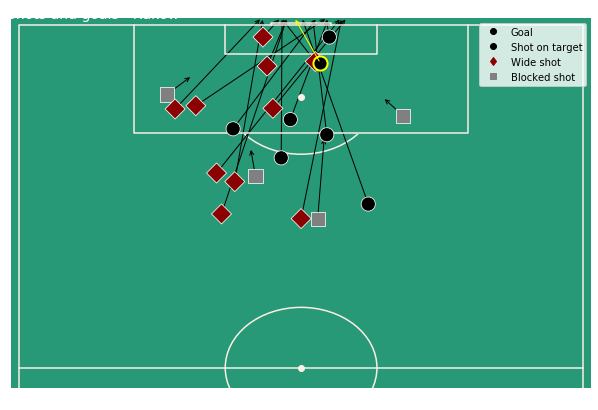

In [274]:
draw_fancy_pitch("#289976","#faf0e6","v","half")

#SHOTS
sns.scatterplot(data=shots_rakow, x='rev_y', y='pos_x', zorder=12, s=200, 
                hue='action_type_name', style='action_type_name', palette={
                    "Shot on target" : 'black',
                    'Wide shot': 'darkred',
                    'Shot blocked': 'gray'
                    },
                markers =markers_goal)



#GOALS
sns.scatterplot(data=goals_rakow, x='rev_y', y='pos_x', zorder=12, s=200, 
                color='black', edgecolor='yellow', linewidth='2',label='goal', markers=markers_goal)


for i in range(len(shots_rakow)):
    
    plt.annotate('', xy = (shots_rakow.iloc[i]['rev_dest_y'], shots_rakow.iloc[i]['pos_dest_x']), 
                xytext =  (shots_rakow.iloc[i]['rev_y'],      shots_rakow.iloc[i]['pos_x']), 
                arrowprops=dict(arrowstyle="->", color = 'black'))

for i in range(len(goals_rakow)):

    plt.annotate('', xy = (goals_rakow.iloc[i]['rev_dest_y'], goals_rakow.iloc[i]['pos_dest_x']), 
            xytext =      (goals_rakow.iloc[i]['rev_y'],      goals_rakow.iloc[i]['pos_x']), 
            arrowprops=dict(arrowstyle="->", color = 'yellow'), zorder=13)
    
#BOX TEXT
plt.gcf().text(0.12, 0.88, 'Shots and goals - Raków', fontsize=14, color='white')
plt.gcf().text(0.55, 0.1, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=12, color='white')    


#LEGEND
custom = [Line2D([], [],  marker='o', color='black',  linestyle='None'),
          Line2D([], [],  marker='o', color='black', linestyle='None'),
          Line2D([], [],  marker='d', color='darkred',  linestyle='None'),
          Line2D([], [],  marker='s', color='grey',  linestyle='None')]

plt.legend(custom, ['Goal', 'Shot on target', 'Wide shot', 'Blocked shot'], loc='upper right')

#SAVE
plt.savefig(r'rakow-cracovia/goals-rakow.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

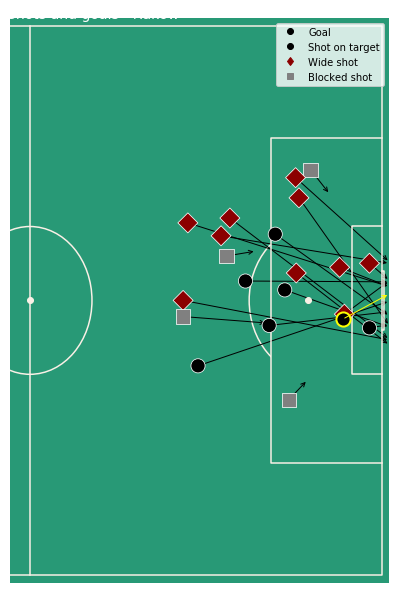

In [150]:
draw_fancy_pitch("#289976","#faf0e6","h","half")

markers_goal = {"Goal": "o",
               "Shot on target" : 'o',
               'Wide shot': 'D',
               'Shot blocked': 's'}

#SHOTS
sns.scatterplot(data=shots_rakow, x='pos_x', y='pos_y', zorder=12, s=200, 
                hue='action_type_name', style='action_type_name', palette={
                    "Shot on target" : 'black',
                    'Wide shot': 'darkred',
                    'Shot blocked': 'gray'
                    },
                markers =markers_goal)



#GOALS
sns.scatterplot(data=goals_rakow, x='pos_x', y='pos_y', zorder=12, s=200, 
                color='black', edgecolor='yellow', linewidth='2',label='goal', markers=markers_goal)


for i in range(len(shots_rakow)):
    
    plt.annotate('', xy = (shots_rakow.iloc[i]['pos_dest_x'], shots_rakow.iloc[i]['pos_dest_y']), 
                xytext =  (shots_rakow.iloc[i]['pos_x'],      shots_rakow.iloc[i]['pos_y']), 
                arrowprops=dict(arrowstyle="->", color = 'black'))

for i in range(len(goals_rakow)):

    plt.annotate('', xy = (goals_rakow.iloc[i]['pos_dest_x'], goals_rakow.iloc[i]['pos_dest_y']), 
            xytext =      (goals_rakow.iloc[i]['pos_x'],      goals_rakow.iloc[i]['pos_y']), 
            arrowprops=dict(arrowstyle="->", color = 'yellow'), zorder=13)
    
#BOX TEXT
plt.gcf().text(0.12, 0.88, 'Shots and goals - Raków', fontsize=14, color='white')
plt.gcf().text(0.55, 0.1, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=12, color='white')    


#LEGEND
custom = [Line2D([], [],  marker='o', color='black',  linestyle='None'),
          Line2D([], [],  marker='o', color='black', linestyle='None'),
          Line2D([], [],  marker='d', color='darkred',  linestyle='None'),
          Line2D([], [],  marker='s', color='grey',  linestyle='None')]

plt.legend(custom, ['Goal', 'Shot on target', 'Wide shot', 'Blocked shot'], loc='upper right')

#SAVE
plt.savefig(r'rakow-cracovia/goals-rakow.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)

<h2> Goal Actions </h2>

In [40]:
# GROUP BY POSSESSION NUMBERS
posses = df.groupby('possession_number')[['t_seconds', 'action_type_name']].apply(lambda action: action.values.tolist()).reset_index(name='action_seq')

In [41]:
posses['ends_in_goal'] = posses.apply(lambda pos: sorted(pos['action_seq'])[-1][1] == 'Goal', axis=1)

In [42]:
goal_actions = posses.loc[posses['ends_in_goal'] == True]

Text(0.12, 0.1, 'source: Ekstrastats')

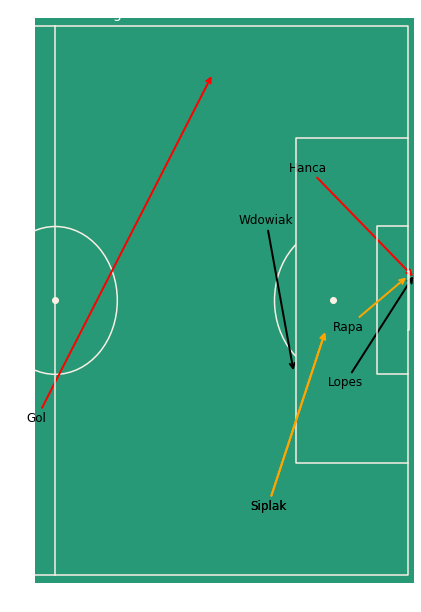

In [34]:
draw_fancy_pitch("#289976","#faf0e6","h","half")
# sns.scatterplot(data=goals.loc[goals['team_name'] == 'Cracovia'], x='pos_x', y='pos_y', zorder=12, s=200, hue='team_name')
# sns.scatterplot(data=goals, x=(int('pos_dest_x')-5), y='pos_dest_y', color='red', s=100)

for i in range(len(df)):
    
    if df.iloc[i]['possession_number'] == 16:
        playername = df.iloc[i]['player_name'].split(' ')[-1]
        plt.annotate(playername, xy = (df.iloc[i]['pos_dest_x'], df.iloc[i]['pos_dest_y']), 
                        xytext =  (df.iloc[i]['pos_x'],      df.iloc[i]['pos_y']), 
                        arrowprops=dict(arrowstyle="->", color='red', linewidth=2), size=12)
        
    
    elif df.iloc[i]['possession_number'] == 94:
        playername = df.iloc[i]['player_name'].split(' ')[-1]
        plt.annotate(playername, xy = (df.iloc[i]['pos_dest_x'], df.iloc[i]['pos_dest_y']), 
                        xytext =  (df.iloc[i]['pos_x'],      df.iloc[i]['pos_y']), 
                        arrowprops=dict(arrowstyle="->", color='black', linewidth=2), size=12)
        
    elif df.iloc[i]['possession_number'] == 124:
        playername = df.iloc[i]['player_name'].split(' ')[-1]
        plt.annotate(playername, xy = (df.iloc[i]['pos_dest_x']-1, df.iloc[i]['pos_dest_y']), 
                        xytext =  (df.iloc[i]['pos_x'],      df.iloc[i]['pos_y']), 
                        arrowprops=dict(arrowstyle="->", color='orange', linewidth=2), size=12, zorder=13)
    
plt.gcf().text(0.12, 0.88, 'Goal Scoring Actions - Cracovia', fontsize=14, color='white')
plt.gcf().text(0.55, 0.1, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=12, color='white')    

# plt.savefig(r'rakow-cracovia/goal-scoring-actions-cracovia.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)        

Text(0.13, 0.03, 'source: Ekstrastats')

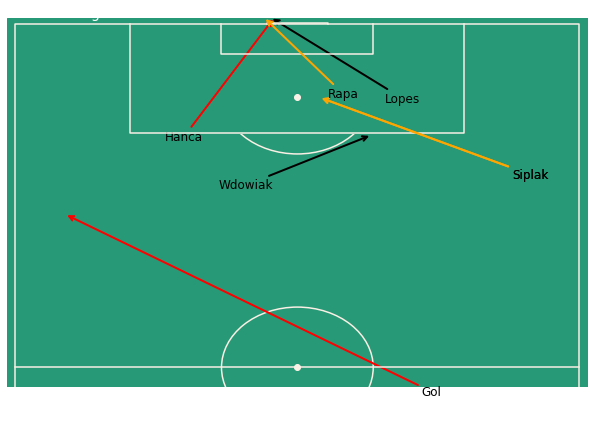

In [61]:
draw_fancy_pitch("#289976","#faf0e6","v","half")
# sns.scatterplot(data=goals.loc[goals['team_name'] == 'Cracovia'], x='pos_x', y='pos_y', zorder=12, s=200, hue='team_name')
# sns.scatterplot(data=goals, x=(int('pos_dest_x')-5), y='pos_dest_y', color='red', s=100)

for i in range(len(df)):
    
    
    if df.iloc[i]['possession_number'] == 16:
        playername = df.iloc[i]['player_name'].split(' ')[-1]     
        plt.annotate(playername, xy = (df.iloc[i]['rev_dest_y'], df.iloc[i]['pos_dest_x']), 
                            xytext =  (df.iloc[i]['rev_y'],      df.iloc[i]['pos_x']), 
                        arrowprops=dict(arrowstyle="->", color='red', linewidth=2), size=12)
        
        
        
    
    elif df.iloc[i]['possession_number'] == 94:
        playername = df.iloc[i]['player_name'].split(' ')[-1]
        plt.annotate(playername, xy = (df.iloc[i]['rev_dest_y'], df.iloc[i]['pos_dest_x']), 
                            xytext =  (df.iloc[i]['rev_y'],      df.iloc[i]['pos_x']), 
                        arrowprops=dict(arrowstyle="->", color='black', linewidth=2), size=12)
        
        
        
    elif df.iloc[i]['possession_number'] == 124:
        playername = df.iloc[i]['player_name'].split(' ')[-1]
        plt.annotate(playername, xy = (df.iloc[i]['rev_dest_y']-1, df.iloc[i]['pos_dest_x']), 
                            xytext =  (df.iloc[i]['rev_y'],      df.iloc[i]['pos_x']), 
                        arrowprops=dict(arrowstyle="->", color='orange', linewidth=2), size=12, zorder=13)
    
        
        
plt.gcf().text(0.13, 0.88, 'Goal Scoring Actions - Cracovia', fontsize=14, color='white')
plt.gcf().text(0.68, 0.03, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.13, 0.03, 'source: Ekstrastats', fontsize=12, color='white')    

# plt.savefig(r'rakow-cracovia/goal-scoring-actions-cracovia.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)        

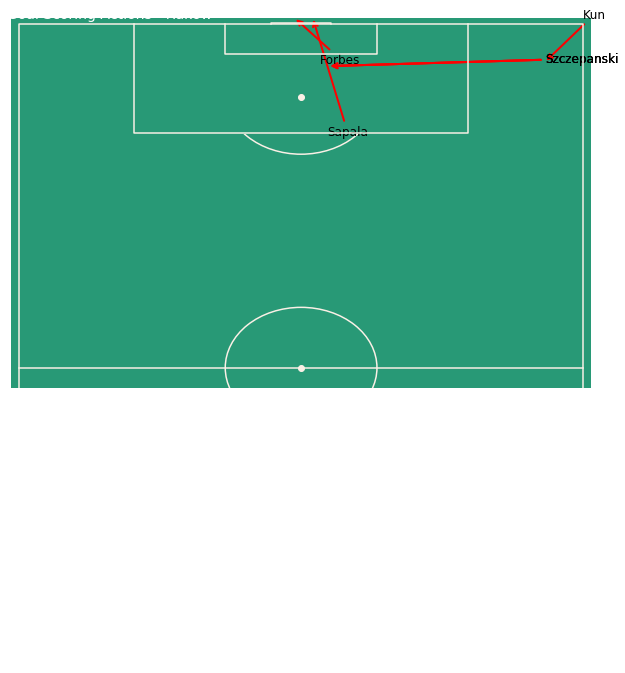

In [63]:
draw_fancy_pitch("#289976","#faf0e6","v","half")

for i in range(len(df)):
    if df.iloc[i]['possession_number'] == 35:
#         plt.scatter(x=df.iloc[i]['pos_x'], y=df.iloc[i]['pos_y'], zorder=12, s=100)
        playername = df.iloc[i]['player_name'].split(' ')[-1]
        
        plt.annotate(playername, xy = (df.iloc[i]['rev_dest_y'], df.iloc[i]['pos_dest_x']), 
                                 xytext =  (df.iloc[i]['rev_y'],      df.iloc[i]['pos_x']), 
                        arrowprops=dict(arrowstyle="->", color='red', linewidth=2), size=12)
        
#         plt.text(df.iloc[i]['rev_y'], df.iloc[i]['pos_x'], playername, 
#         ha='center', va='center', size=10, bbox=dict(boxstyle="round", fc='lightblue'))
        
plt.gcf().text(0.12, 0.88, 'Goal Scoring Actions - Raków', fontsize=14, color='white')
plt.gcf().text(0.55, 0.1, 'twitter.com/patryk_lowicki', fontsize=12, color='white')
plt.gcf().text(0.12, 0.1, 'source: Ekstrastats', fontsize=12, color='white')    

plt.savefig(r'rakow-cracovia/goal-scoring-actions-rakow.png', bbox_inches='tight', pad_inches=0.1, facecolor="#289976", dpi=200)    

<h2> Accumulated shots </h2>

In [180]:
chances_time = df.loc[df['action_type_name'].isin(shots_all)][['t_seconds','team_name','player_name']]
chances_time['goal'] = 0

In [191]:
goals_temp = goals[['t_seconds', 'team_name', 'player_name']].copy()
goals_temp['goal'] = 1

In [193]:
chances_time = pd.concat([chances_time, goals_temp]).sort_values(by='t_seconds')

In [198]:
chances_time['chance_cracovia'] = np.where(chances_time['team_name'] == 'Cracovia',1,0)
chances_time['chance_rakow'] = np.where(chances_time['team_name'] != 'Cracovia',1,0)

chances_time['acc_c'] = np.add.accumulate(chances_time['chance_cracovia'])
chances_time['acc_r'] = np.add.accumulate(chances_time['chance_rakow'])

goals_time_c = chances_time.loc[(chances_time['goal'] == 1)]

In [230]:
goals_time_c['minute'] = goals_time_c['t_seconds'].dt.minute

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
for i in range(len(goals_time_c)):
    row = goals_time_c.iloc[i]
    playername = row['player_name'].split(' ')[-1]
    goal_time  = row['minute']

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


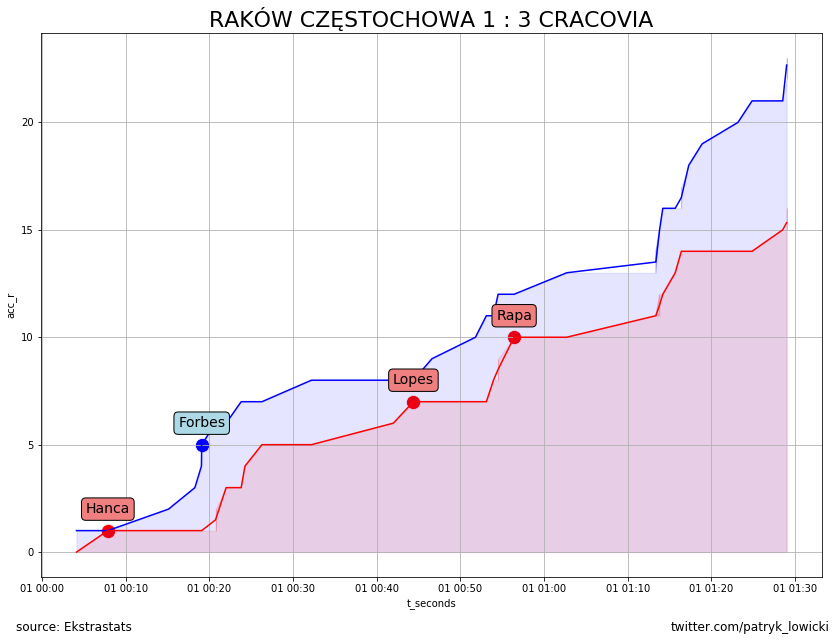

In [253]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)

plt.title('RAKÓW CZĘSTOCHOWA 1 : 3 CRACOVIA', fontdict={'fontsize' : 22})

#LINES
sns.lineplot(data=chances_time, x='t_seconds', y='acc_r', ax=ax, color='blue')
sns.lineplot(data=chances_time, x='t_seconds', y='acc_c', ax=ax, color='red')

#DOTS
sns.scatterplot(data=goals_time_c.loc[goals_time_c['team_name'] == 'Cracovia'], x='t_seconds', y='acc_c', s=200, ax=ax, color='red')
sns.scatterplot(data=goals_time_c.loc[goals_time_c['team_name'] != 'Cracovia'], x='t_seconds', y='acc_r', s=200, ax=ax, color='blue')

#TEXT

bbox_props = dict(boxstyle="round", fc='red')

for i in range(len(goals_time_c)):
    row = goals_time_c.iloc[i]
    playername = row['player_name'].split(' ')[-1]
    
    if row['team_name'] == 'Cracovia':      
        ax.text(row['t_seconds'], row['acc_c']+1, playername, 
                ha='center', va='center', size=14, bbox=dict(boxstyle="round", fc='lightcoral'))
    
    else:
        ax.text(row['t_seconds'], row['acc_r']+1, playername, 
                ha='center', va='center', size=14, bbox=dict(boxstyle="round", fc='lightblue'))

    
        


#FILL AREA BETWEEN LINE AND X 
plt.fill_between(chances_time['t_seconds'], chances_time['acc_r'], alpha=0.1, color='blue')  
plt.fill_between(chances_time['t_seconds'], chances_time['acc_c'], alpha=0.1, color='red')          
        
plt.grid()

#IMAGE TEXT
plt.gcf().text(0.75, 0.05, 'twitter.com/patryk_lowicki', fontsize=12)
plt.gcf().text(0.1, 0.05, 'source: Ekstrastats', fontsize=12)          
          
plt.savefig(f'rakow-cracovia/{teams[0]}_{teams[1]}_xg_timeplot.png', box_inches='tight')